In [66]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
data = pd.read_csv('../data/Train_call.txt',delimiter = '\t')
labels = pd.read_csv('../data/Train_clinical.txt',delimiter = '\t')

In [68]:
data.head()

,Chromosome,Start,End,Nclone,Array.129,Array.34,Array.67,Array.24,Array.22,Array.36,...,Array.64,Array.89,Array.30,Array.35,Array.93,Array.10,Array.123,Array.100,Array.134,Array.130
0,1,2927,43870,3,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,-1,0
1,1,85022,216735,4,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,-1,0
2,1,370546,372295,4,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,-1,0
3,1,471671,786483,5,0,0,0,0,0,0,...,0,1,1,0,1,0,0,0,-1,0
4,1,792533,907406,13,0,0,0,0,0,0,...,0,1,1,0,1,0,0,0,-1,0


In [69]:
data = data.transpose()
data

,0,1,2,3,4,5,6,7,8,9,...,2824,2825,2826,2827,2828,2829,2830,2831,2832,2833
Chromosome,1,1,1,1,1,1,1,1,1,1,...,23,23,23,23,23,23,23,23,23,23
Start,2927,85022,370546,471671,792533,912799,1271190,1676445,1738295,2481927,...,151067607,152422390,152552851,152576854,152994680,153062077,153466463,153504394,153938998,153997146
End,43870,216735,372295,786483,907406,1266212,1590570,1703748,2477597,2562342,...,152416606,152548587,152570071,152935130,153054487,153452633,153491568,153933426,153989329,154492924
Nclone,3,4,4,5,13,96,45,4,104,14,...,159,20,6,64,5,57,4,55,5,43
Array.129,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Array.10,0,0,0,0,0,0,0,0,0,0,...,1,1,0,1,1,1,1,1,1,1
Array.123,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
Array.100,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
Array.134,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,1


In [70]:
data = data[4:]
data

,0,1,2,3,4,5,6,7,8,9,...,2824,2825,2826,2827,2828,2829,2830,2831,2832,2833
Array.129,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,0,1,1,1,1,1
Array.34,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
Array.67,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
Array.24,0,0,0,0,0,0,0,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
Array.22,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Array.10,0,0,0,0,0,0,0,0,0,0,...,1,1,0,1,1,1,1,1,1,1
Array.123,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
Array.100,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
Array.134,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,1


In [71]:
data = data.reset_index()
data

,index,0,1,2,3,4,5,6,7,8,...,2824,2825,2826,2827,2828,2829,2830,2831,2832,2833
0,Array.129,0,0,0,0,0,0,0,0,0,...,2,2,2,2,0,1,1,1,1,1
1,Array.34,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
2,Array.67,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
3,Array.24,0,0,0,0,0,0,0,-1,0,...,0,0,0,0,0,0,0,0,0,0
4,Array.22,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Array.10,0,0,0,0,0,0,0,0,0,...,1,1,0,1,1,1,1,1,1,1
96,Array.123,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
97,Array.100,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
98,Array.134,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,1


In [72]:
data.rename(columns={'index':'Sample'}, inplace=True)
data.head()

,Sample,0,1,2,3,4,5,6,7,8,...,2824,2825,2826,2827,2828,2829,2830,2831,2832,2833
0,Array.129,0,0,0,0,0,0,0,0,0,...,2,2,2,2,0,1,1,1,1,1
1,Array.34,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
2,Array.67,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
3,Array.24,0,0,0,0,0,0,0,-1,0,...,0,0,0,0,0,0,0,0,0,0
4,Array.22,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


In [73]:
labels.head()

,Sample,Subgroup
0,Array.129,HER2+
1,Array.34,HR+
2,Array.67,HR+
3,Array.24,Triple Neg
4,Array.22,Triple Neg


In [74]:
# Combine labels and instances
combined = pd.merge(data,labels,on='Sample',)
combined

,Sample,0,1,2,3,4,5,6,7,8,...,2825,2826,2827,2828,2829,2830,2831,2832,2833,Subgroup
0,Array.129,0,0,0,0,0,0,0,0,0,...,2,2,2,0,1,1,1,1,1,HER2+
1,Array.34,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,HR+
2,Array.67,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,HR+
3,Array.24,0,0,0,0,0,0,0,-1,0,...,0,0,0,0,0,0,0,0,0,Triple Neg
4,Array.22,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,Triple Neg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Array.10,0,0,0,0,0,0,0,0,0,...,1,0,1,1,1,1,1,1,1,HER2+
96,Array.123,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,HR+
97,Array.100,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,HR+
98,Array.134,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,HR+


In [75]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

In [76]:
X = combined.iloc[:,1:2835]
y = combined['Subgroup']

combined.head()

,Sample,0,1,2,3,4,5,6,7,8,...,2825,2826,2827,2828,2829,2830,2831,2832,2833,Subgroup
0,Array.129,0,0,0,0,0,0,0,0,0,...,2,2,2,0,1,1,1,1,1,HER2+
1,Array.34,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,HR+
2,Array.67,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,HR+
3,Array.24,0,0,0,0,0,0,0,-1,0,...,0,0,0,0,0,0,0,0,0,Triple Neg
4,Array.22,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,Triple Neg


In [77]:
# check if class lables are balanced or not
y.value_counts()

HR+           36
HER2+         32
Triple Neg    32
Name: Subgroup, dtype: int64

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.25, random_state=4)
print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)

X_train (75, 2834)
X_test (25, 2834)
y_train (75,)
y_test (25,)


In [233]:
y_train.value_counts()

HR+           27
HER2+         25
Triple Neg    23
Name: Subgroup, dtype: int64

# Feature selection 

### multinomial logistic regression

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    

Optimal number of features : 33


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


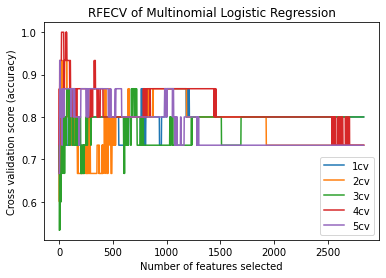

In [79]:
# Create the RFE object and compute a cross-validated score.
lr = LogisticRegression(multi_class='multinomial')
# The "accuracy" scoring shows the proportion of correct classifications

min_features_to_select = 1  # Minimum number of features to consider
rfecv_lr = RFECV(
    estimator=lr,
    step=1,
    cv=StratifiedKFold(5),
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
)
rfecv_lr.fit(X_train, y_train)

print("Optimal number of features : %d" % rfecv_lr.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(min_features_to_select, len(rfecv_lr.grid_scores_) + min_features_to_select),
    rfecv_lr.grid_scores_,
)
plt.title("RFECV of Multinomial Logistic Regression")
plt.legend(['1cv', '2cv', '3cv', '4cv', '5cv'], loc=4)
plt.show()

In [112]:
# selected features
fs_lr = rfecv_lr.get_feature_names_out()
fs_lr

array(['x38', 'x192', 'x486', 'x672', 'x695', 'x848', 'x849', 'x1061',
       'x1091', 'x1563', 'x1569', 'x1584', 'x1656', 'x1663', 'x1672',
       'x1677', 'x1678', 'x1883', 'x1895', 'x1899', 'x1952', 'x2017',
       'x2021', 'x2023', 'x2026', 'x2184', 'x2210', 'x2213', 'x2214',
       'x2218', 'x2528', 'x2735', 'x2742'], dtype=object)

In [140]:
# get selected features for training set
X_train_fs_lr = pd.DataFrame(rfecv_lr.transform(X_train))

# rename new dataframe for training set
for i, col in enumerate(X_train_fs_lr.columns):
    X_train_fs_lr.rename(columns={col:fs_lr[i]}, inplace=True)

X_train_fs_lr


,x38,x192,x486,x672,x695,x848,x849,x1061,x1091,x1563,...,x2023,x2026,x2184,x2210,x2213,x2214,x2218,x2528,x2735,x2742
0,-1,-1,0,-1,0,0,0,-1,-1,0,...,-1,-1,2,0,0,0,-1,0,0,0
1,0,0,0,0,0,0,0,-1,0,-1,...,0,0,-1,-1,-1,-1,-1,0,-1,-1
2,0,-1,-1,-1,-1,0,0,-1,-1,-1,...,0,0,2,-1,-1,-1,1,0,0,0
3,0,0,0,0,0,0,0,-1,-1,0,...,-1,-1,2,-1,-1,-1,1,0,0,0
4,0,1,0,0,0,-1,-1,-1,-1,0,...,-1,-1,-1,-1,0,0,0,0,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,0,1,1,-1,-1,0,0,0,0,1,...,1,1,0,0,0,0,1,-1,0,0
71,0,-1,0,0,-1,-1,-1,0,-1,0,...,0,0,0,0,0,0,1,-1,0,-1
72,0,-1,0,0,0,0,0,0,1,-1,...,0,0,0,-1,-1,-1,-1,0,0,-1
73,1,1,0,-1,-1,-1,-1,0,0,1,...,0,0,1,0,0,0,1,0,0,-1


In [139]:
# get selected features for test set
X_test_fs_lr = pd.DataFrame(rfecv_lr.transform(X_test))

# rename new dataframe for test set
for i, col in enumerate(X_test_fs_lr.columns):
    X_test_fs_lr.rename(columns={col:fs_lr[i]}, inplace=True)

X_test_fs_lr


,x38,x192,x486,x672,x695,x848,x849,x1061,x1091,x1563,...,x2023,x2026,x2184,x2210,x2213,x2214,x2218,x2528,x2735,x2742
0,1,-1,1,-1,-1,-1,-1,0,0,0,...,0,0,-1,-1,-1,-1,-1,0,0,-1
1,0,0,0,0,1,-1,-1,0,0,-1,...,-1,-1,0,0,0,0,1,0,-1,-1
2,-1,2,1,0,0,-1,-1,0,0,0,...,-1,-1,0,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0,-1,2,-1,...,0,0,1,1,1,0,1,0,-1,-1
4,1,0,0,0,0,1,1,0,-1,1,...,0,0,2,1,1,1,1,-1,1,1
5,0,1,0,0,0,0,0,0,0,-1,...,-1,-1,0,0,0,0,0,0,0,-1
6,0,-1,-1,-1,-1,-1,-1,-1,0,-1,...,0,0,-1,-1,-1,-1,1,0,1,0
7,0,-1,0,-1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
8,0,0,1,0,0,-1,-1,-1,-1,-1,...,0,0,-1,-1,-1,-1,-1,0,-1,-1
9,1,1,0,0,0,1,1,-1,1,-1,...,1,1,2,-1,-1,-1,0,-1,-1,-1


### Random Forest

In [80]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
# Create the RFE object and compute a cross-validated score.
rf = RandomForestClassifier(random_state = 42)
# The "accuracy" scoring shows the proportion of correct classifications

min_features_to_select = 1  # Minimum number of features to consider
rfecv_rf = RFECV(
    estimator=rf,
    step=1,
    cv=StratifiedKFold(5),
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
)
rfecv_rf.fit(X_train, y_train)

print("Optimal number of features : %d" % rfecv_rf.n_features_)

# Plot number of features VS. cross-validation scores
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(min_features_to_select, len(rfecv_rf.grid_scores_) + min_features_to_select),
    rfecv_rf.grid_scores_,
)
plt.title("RFECV of Random Forest")
plt.legend(['1cv', '2cv', '3cv', '4cv', '5cv'], loc=4)
plt.show()

KeyboardInterrupt: 

### XGboost

In [83]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder 

In [84]:
y_train

60         HER2+
5            HR+
70         HER2+
71         HER2+
19           HR+
         ...    
87    Triple Neg
1            HR+
69           HR+
55    Triple Neg
46         HER2+
Name: Subgroup, Length: 75, dtype: object

In [85]:
# label encode y_train for xgboost
lc = LabelEncoder() 
lc = lc.fit(y_train) 
lc_y_train = lc.transform(y_train)

# transform lc_y_train into series
lc_y_train = pd.Series(lc_y_train)

In [283]:
# label encode y_test
lc1 = lc.fit(y_test) 
lc_y_test = lc1.transform(y_test)

# transform lc_y_test into series
lc_y_test = pd.Series(lc_y_test)

Optimal number of features : 73


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


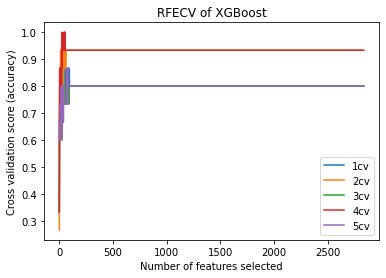

In [86]:
# Create the RFE object and compute a cross-validated score.
xgb = XGBClassifier(random_state=42)
# The "accuracy" scoring shows the proportion of correct classifications

min_features_to_select = 1  # Minimum number of features to consider
rfecv_xgb = RFECV(
    estimator=xgb,
    step=1,
    cv=StratifiedKFold(5),
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
)
rfecv_xgb.fit(X_train, lc_y_train)

print("Optimal number of features : %d" % rfecv_xgb.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(min_features_to_select, len(rfecv_xgb.grid_scores_) + min_features_to_select),
    rfecv_xgb.grid_scores_,
)
plt.title("RFECV of XGBoost")
plt.legend(['1cv', '2cv', '3cv', '4cv', '5cv'], loc=4)
plt.show()

In [620]:
# selected features
fs_xgb = rfecv_xgb.get_feature_names_out()
fs_xgb

array(['x3', 'x20', 'x29', 'x40', 'x164', 'x174', 'x183', 'x185', 'x195',
       'x202', 'x226', 'x230', 'x262', 'x342', 'x486', 'x491', 'x546',
       'x645', 'x672', 'x694', 'x695', 'x743', 'x841', 'x873', 'x895',
       'x1030', 'x1057', 'x1060', 'x1061', 'x1068', 'x1080', 'x1091',
       'x1249', 'x1294', 'x1326', 'x1501', 'x1563', 'x1566', 'x1570',
       'x1581', 'x1596', 'x1656', 'x1663', 'x1672', 'x1678', 'x1679',
       'x1785', 'x1812', 'x1882', 'x1885', 'x1891', 'x1899', 'x1910',
       'x1913', 'x1928', 'x1951', 'x1953', 'x1971', 'x1973', 'x2030',
       'x2034', 'x2094', 'x2140', 'x2147', 'x2184', 'x2419', 'x2550',
       'x2608', 'x2723', 'x2742', 'x2751', 'x2760', 'x2832'], dtype=object)

In [621]:
# get selected features for training set
X_train_fs_xgb = pd.DataFrame(rfecv_xgb.transform(X_train))

# rename new dataframe for training set
for i, col in enumerate(X_train_fs_xgb.columns):
    X_train_fs_xgb.rename(columns={col:fs_xgb[i]}, inplace=True)

X_train_fs_xgb


,x3,x20,x29,x40,x164,x174,x183,x185,x195,x202,...,x2147,x2184,x2419,x2550,x2608,x2723,x2742,x2751,x2760,x2832
0,0,-1,-1,-1,-1,-1,0,0,0,0,...,0,2,0,0,0,0,0,0,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,-1,0,1,1,-1,-1,-1,-1,1
2,0,0,0,0,0,0,0,0,1,0,...,-1,2,-1,-1,0,0,0,0,0,1
3,0,0,0,1,0,0,1,1,1,1,...,0,2,-1,-1,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,-1,-1,0,0,0,-1,-1,-1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,1,1,0,0,0,1,1,0,1,1,...,0,0,-1,0,0,0,0,1,1,1
71,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,-1,0,1,1
72,0,0,0,0,0,0,1,1,1,1,...,2,0,0,1,-1,0,-1,0,-1,2
73,0,0,1,1,0,0,0,1,0,0,...,-1,1,-1,1,1,0,-1,-1,1,0


In [622]:
# get selected features for test set
X_test_fs_xgb = pd.DataFrame(rfecv_xgb.transform(X_test))

# rename new dataframe for test set
for i, col in enumerate(X_test_fs_xgb.columns):
    X_test_fs_xgb.rename(columns={col:fs_xgb[i]}, inplace=True)

X_test_fs_xgb

,x3,x20,x29,x40,x164,x174,x183,x185,x195,x202,...,x2147,x2184,x2419,x2550,x2608,x2723,x2742,x2751,x2760,x2832
0,0,0,0,1,0,0,0,0,1,1,...,-1,-1,0,-1,0,-1,-1,1,1,2
1,0,0,0,0,0,0,1,1,1,1,...,0,0,-1,1,1,-1,-1,-1,1,2
2,0,2,0,-1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,-1,1
3,0,0,0,0,0,0,1,1,1,1,...,1,1,1,0,0,-1,-1,-1,0,1
4,0,0,0,0,1,1,1,1,1,1,...,-1,2,0,1,1,1,1,1,0,0
5,0,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,-1,-1,0,-1,1
6,0,0,-1,0,0,0,1,1,1,1,...,-1,-1,1,-1,0,1,0,0,0,1
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-1,0,0,1
8,-1,0,-1,0,0,0,0,0,0,0,...,-1,-1,0,-1,0,-1,-1,-1,-1,2
9,0,0,0,1,-1,0,0,0,1,1,...,-1,2,0,1,0,-1,-1,-1,1,2


### Chi-square
Chi-square is not a good method since we have negative values in our data set.

### Mutual information

In [699]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from matplotlib.pyplot import figure
from matplotlib import pyplot

In [712]:
# check overall distribution based on mutual information
fs_mutinfo = SelectKBest(score_func=mutual_info_classif(random_state=42), k='all')
fs_mutinfo.fit(X_train, y_train)
# X_train_fs = fs_mutinfo.transform(X_train)
# # X_test_fs = fs.transform(X_test)

TypeError: mutual_info_classif() missing 2 required positional arguments: 'X' and 'y'

Feature 0: 0.034068
Feature 1: 0.000000
Feature 2: 0.010488
Feature 3: 0.059609
Feature 4: 0.000000
Feature 5: 0.026854
Feature 6: 0.000000
Feature 7: 0.048331
Feature 8: 0.086994
Feature 9: 0.149368
Feature 10: 0.030746
Feature 11: 0.000000
Feature 12: 0.004903
Feature 13: 0.018738
Feature 14: 0.134933
Feature 15: 0.000000
Feature 16: 0.065853
Feature 17: 0.011124
Feature 18: 0.165814
Feature 19: 0.000000
Feature 20: 0.002763
Feature 21: 0.076676
Feature 22: 0.014300
Feature 23: 0.056520
Feature 24: 0.068710
Feature 25: 0.163310
Feature 26: 0.000000
Feature 27: 0.002283
Feature 28: 0.052740
Feature 29: 0.000000
Feature 30: 0.000000
Feature 31: 0.000000
Feature 32: 0.226159
Feature 33: 0.069625
Feature 34: 0.106070
Feature 35: 0.068022
Feature 36: 0.052648
Feature 37: 0.070334
Feature 38: 0.074863
Feature 39: 0.034368
Feature 40: 0.027282
Feature 41: 0.043996
Feature 42: 0.032447
Feature 43: 0.000000
Feature 44: 0.057638
Feature 45: 0.000000
Feature 46: 0.044747
Feature 47: 0.138626
Fe

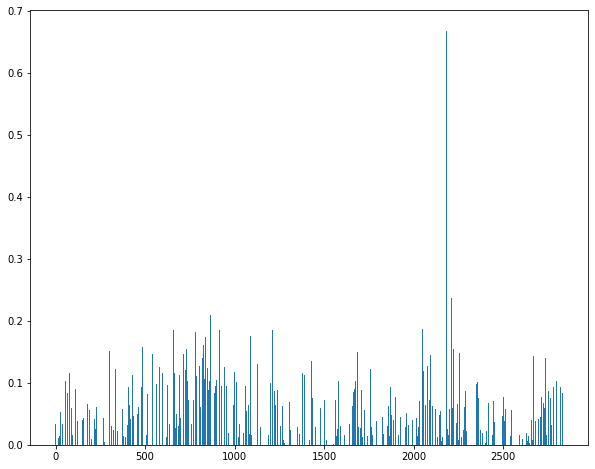

In [709]:
# what are scores for the features
for i in range(len(fs_mutinfo.scores_)):
	print('Feature %d: %f' % (i, fs_mutinfo.scores_[i]))
# plot the scores
figure(figsize=(10,8))
pyplot.bar([i for i in range(len(fs_mutinfo.scores_))], fs_mutinfo.scores_)
pyplot.show()

In [710]:
# calculate the mean score
fs_mutinfo_all_df = pd.DataFrame(fs_mutinfo.scores_)
fs_mutinfo_all_df.rename(columns={0:'Scores'}, inplace=True)
mean_mutinfo = fs_mutinfo_all_df['Scores'].mean()
print('Mean score of mutual information:', mean_mutinfo)

# select features higher or equal to the mean
fs_mutinfo = fs_mutinfo_all_df.loc[fs_mutinfo_all_df['Scores'] >= 0.05]

Mean score of mutual information: 0.03825008687415631


In [711]:
# all features that have mutual information scores equal or above 0.1
fs_mutinfo

,Scores
3,0.059609
8,0.086994
9,0.149368
14,0.134933
16,0.065853
...,...
2820,0.066537
2821,0.093151
2824,0.056525
2831,0.135082


In [669]:
# Select the top 368 features (features with mutual information score >= 0.1)
fs_mutinfo = SelectKBest(score_func=mutual_info_classif, k=881)
fs_mutinfo.fit(X_train, y_train)

# list all selected features by from mutual information
features_mutinfo = fs_mutinfo.get_feature_names_out()

In [670]:
# get selected features for train and test sets
X_train_fs_mutinfo = pd.DataFrame(fs_mutinfo.transform(X_train))
X_test_fs_mutinfo = pd.DataFrame(fs_mutinfo.transform(X_test))

# rename column names for train set 
for i, col in enumerate(X_train_fs_mutinfo.columns):
    X_train_fs_mutinfo.rename(columns={col:features_mutinfo[i]}, inplace=True)
    
# rename column names for test set 
for i, col in enumerate(X_test_fs_mutinfo.columns):
    X_test_fs_mutinfo.rename(columns={col:features_mutinfo[i]}, inplace=True)

## GridSearchCV - XGBoost

In [157]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from scipy.stats import loguniform
from sklearn import metrics   

### Using features from mutual information

In [671]:
# define model
model = XGBClassifier(random_state=42)

# define evaluation
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search_svm space_svm
space_xgb = dict()
space_xgb['max_depth'] = range(3,10)
space_xgb['min_child_weight'] = range(1,6)
space_xgb['gamma'] = [i/10.0 for i in range(0,5)]
# space_xgb['subsample'] = [i/10.0 for i in range(6,10)]
# space_xgb['colsample_bytree'] = [i/10.0 for i in range(6,10)]
# space_xgb['reg_alpha'] = [1e-5, 1e-2, 0.1, 1, 100]

# define search_svm
search_xgb = GridSearchCV(model, space_xgb, scoring='accuracy', n_jobs=-1, cv=5)

# execute search_svm
result_xgb = search_xgb.fit(X_train_fs_mutinfo, lc_y_train)

# # execute search_svm (on feature selection data)
# result_svm = search_svm.fit(x_train_new_svm, y_train)

# summarize result_svm
print('Best Score: %s' % result_xgb.best_score_)
print('Best Hyperparameters: %s' % result_xgb.best_params_)

# print winning set of hyperparameters
from pprint import pprint
pprint(result_xgb.best_estimator_.get_params())

Best Score: 0.8800000000000001
Best Hyperparameters: {'gamma': 0.0, 'max_depth': 3, 'min_child_weight': 2}
{'base_score': 0.5,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': 0.0,
 'gpu_id': -1,
 'grow_policy': 'depthwise',
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_bin': 256,
 'max_cat_to_onehot': 4,
 'max_delta_step': 0,
 'max_depth': 3,
 'max_leaves': 0,
 'min_child_weight': 2,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'objective': 'multi:softprob',
 'predictor': 'auto',
 'random_state': 42,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'sampling_method': 'uniform',
 'scale_pos_weight': None,
 'subsample': 1,
 'tree_method': 'exact',
 'use_label_encoder': False,
 'validate_parameters': 1,
 'verbosity': None}


### Using features from XGBoost

In [175]:
# define model
model1 = XGBClassifier(random_state=42)

# define evaluation
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search_svm space_svm
space_xgb1 = dict()
space_xgb1['max_depth'] = range(3,10)
space_xgb1['min_child_weight'] = range(1,6)
space_xgb1['gamma'] = [i/10.0 for i in range(0,5)]
# space_xgb1['subsample'] = [i/10.0 for i in range(6,10)]
# space_xgb1['colsample_bytree'] = [i/10.0 for i in range(6,10)]
space_xgb1['reg_alpha'] = [1e-5, 1e-2, 0.1, 1, 100]

# define search_svm
search_xgb1 = GridSearchCV(model1, space_xgb, scoring='accuracy', n_jobs=-1, cv=5)

# execute search_svm
result_xgb1 = search_xgb.fit(X_train_fs_xgb, lc_y_train)

# # execute search_svm (on feature selection data)
# result_svm = search_svm.fit(x_train_new_svm, y_train)

# summarize result_svm
print('Best Score: %s' % result_xgb1.best_score_)
print('Best Hyperparameters: %s' % result_xgb1.best_params_)

# print winning set of hyperparameters
from pprint import pprint
pprint(result_xgb1.best_estimator_.get_params())

Best Score: 0.9866666666666667
Best Hyperparameters: {'colsample_bytree': 0.6, 'gamma': 0.0, 'max_depth': 3, 'min_child_weight': 2, 'reg_alpha': 1e-05, 'subsample': 0.7}
{'base_score': 0.5,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.6,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': 0.0,
 'gpu_id': -1,
 'grow_policy': 'depthwise',
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_bin': 256,
 'max_cat_to_onehot': 4,
 'max_delta_step': 0,
 'max_depth': 3,
 'max_leaves': 0,
 'min_child_weight': 2,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'objective': 'multi:softprob',
 'predictor': 'auto',
 'random_state': 42,
 'reg_alpha': 1e-05,
 'reg_lambda': 1,
 'sampling_method': 'uniform',
 'scale_pos_weight': None,
 'subsample': 0.7,
 'tree_method': 'exact',
 'use_label_e

# Model Evaluation

In [672]:
# optimal XGBoost 
opt_xgb = result_xgb.best_estimator_
opt_xgb

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=2,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=42, reg_alpha=0, ...)

### Multi-label confusion matrix

In [673]:
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix

In [674]:
X_train_fs_mutinfo

,x2,x3,x14,x15,x16,x17,x18,x19,x21,x22,...,x2763,x2767,x2768,x2771,x2774,x2781,x2794,x2795,x2819,x2830
0,0,0,-1,-1,0,0,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,1,1
2,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,1,2,1,1,1,1
3,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,1,1,1,1,1,1
4,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,1,1,1,1,1,1,1,1,1,1,...,-1,0,0,-1,1,1,2,1,1,1
71,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,1,1
72,0,0,0,0,1,1,0,0,0,0,...,0,1,1,0,2,2,2,2,2,2
73,0,0,0,0,-1,-1,0,0,0,0,...,1,1,1,-1,1,1,1,1,0,0


In [675]:
y_pred_train = opt_xgb.predict(X_train_fs_mutinfo)
y_pred_train

array([0, 1, 0, 0, 1, 0, 2, 2, 2, 1, 1, 1, 2, 0, 0, 0, 2, 2, 1, 1, 2, 0,
       0, 2, 0, 1, 2, 0, 0, 0, 1, 2, 1, 1, 2, 0, 1, 0, 0, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 0, 1, 0, 0, 1, 2, 0, 2, 0, 2, 1, 2, 1, 1, 2, 0, 2, 1,
       2, 0, 0, 1, 2, 1, 1, 2, 0])

In [676]:
confusion_mx_train = confusion_matrix(lc_y_train, y_pred_train)

In [677]:
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
confusion_mx_train_df = pd.DataFrame(confusion_mx_train,
                     index = ['HER2+','HR+','Triple Neg'], 
                     columns = ['HER2+','HR+','Triple Neg'])

In [678]:
confusion_mx_train_df

,HER2+,HR+,Triple Neg
HER2+,25,0,0
HR+,0,27,0
Triple Neg,0,0,23


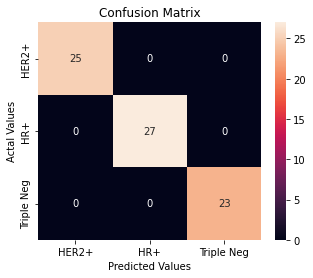

In [679]:
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_mx_train_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()


### Multi-label F1-score

In [680]:
from sklearn.metrics import f1_score

In [681]:
# get f1 score
from sklearn.metrics import f1_score
f1_score_xgb = f1_score(lc_y_train, y_pred_train, average=None)


print('f1 score: ', f1_score_xgb)

f1 score:  [1. 1. 1.]


### Multi-label ROC plot

In [641]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

# Model evaluation (test set)

In [682]:
y_pred_test = opt_xgb.predict(X_test_fs_mutinfo)
y_pred_test

array([2, 1, 1, 1, 0, 1, 2, 1, 1, 0, 2, 2, 0, 0, 0, 1, 1, 2, 2, 1, 2, 1,
       1, 0, 0])

In [683]:
confusion_mx_test = confusion_matrix(lc_y_test, y_pred_test)

In [684]:
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
confusion_mx_test_df = pd.DataFrame(confusion_mx_test,
                     index = ['HER2+','HR+','Triple Neg'], 
                     columns = ['HER2+','HR+','Triple Neg'])

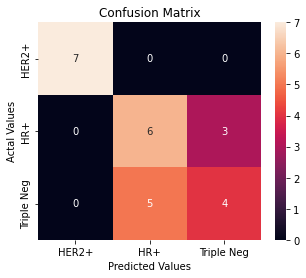

In [685]:
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_mx_test_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [686]:
# get f1 score (K = )
from sklearn.metrics import f1_score
f1_score_xgb_test = f1_score(lc_y_test, y_pred_test, average=None)

print('f1 score: ', f1_score_xgb_test)

f1 score:  [1.  0.6 0.5]
